### Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

### Data Loading

In [ ]:
base_dir="dataset/"

In [3]:
class_labels=os.listdir(base_dir)
print(class_labels)

['EA', 'EH', 'EP', 'NE']


In [4]:
data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=True, color_mode='grayscale', target_size=(128,128))
            image=img_to_array(image)
            image=image/255.0
            data.append([image,count])
        except Exception as e:
                pass
    count=count+1

dataset/EA


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


dataset/EH
dataset/EP
dataset/NE


In [5]:
print(len(data))

3198


In [6]:
X,y =zip(*data)

In [7]:
X

(array([[[0.31764707],
         [0.34509805],
         [0.39607844],
         ...,
         [0.20784314],
         [0.20784314],
         [0.43137255]],
 
        [[0.35686275],
         [0.41568628],
         [0.4392157 ],
         ...,
         [0.3647059 ],
         [0.2627451 ],
         [0.52156866]],
 
        [[0.6392157 ],
         [0.3882353 ],
         [0.2784314 ],
         ...,
         [0.28235295],
         [0.15686275],
         [0.6745098 ]],
 
        ...,
 
        [[0.18431373],
         [0.27450982],
         [0.3137255 ],
         ...,
         [0.8117647 ],
         [0.8156863 ],
         [0.8039216 ]],
 
        [[0.36078432],
         [0.25882354],
         [0.21960784],
         ...,
         [0.8       ],
         [0.8117647 ],
         [0.8039216 ]],
 
        [[0.38039216],
         [0.28627452],
         [0.2627451 ],
         ...,
         [0.61960787],
         [0.7176471 ],
         [0.7882353 ]]], dtype=float32),
 array([[[0.4745098 ],
         [0.42745

In [8]:
print(y)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
X=np.array(X)
y=np.array(y)

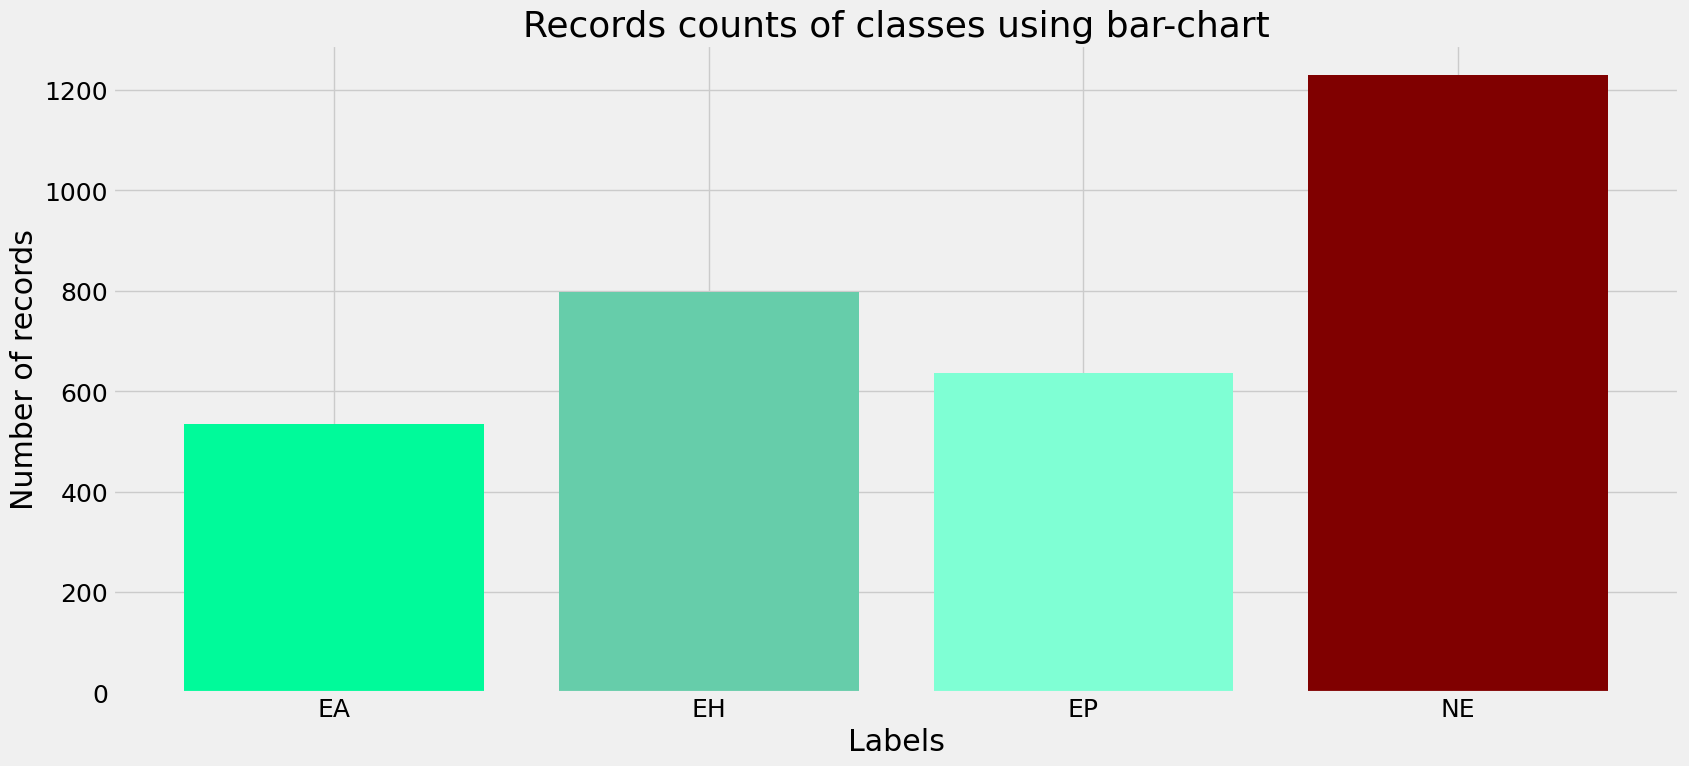

In [10]:
unique,counts=np.unique(y,return_counts=True)
chart_data=list(counts)
chart_labels=['EA','EH','EP','NE']
colors=['mediumspringgreen','mediumaquamarine','aquamarine','maroon']
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size']=18
    plt.bar(x=chart_labels,height=chart_data,color=colors)
    plt.title(label='Records counts of classes using bar-chart')
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of records')
    plt.show()

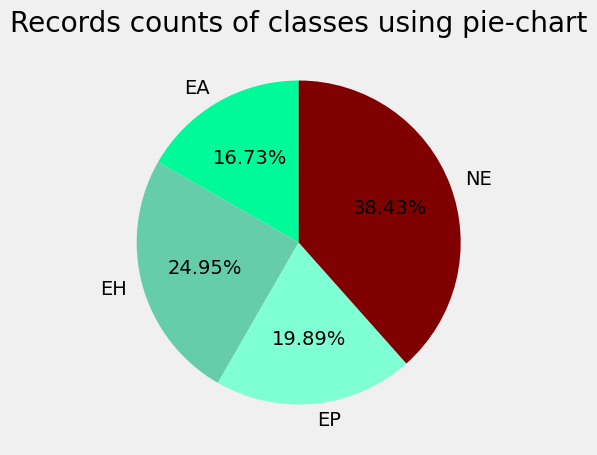

In [11]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.pie(x=chart_data,labels=chart_labels,colors=colors,autopct='%.2f%%',explode=None,startangle=90)
    plt.title(label='Records counts of classes using pie-chart')
    plt.show()

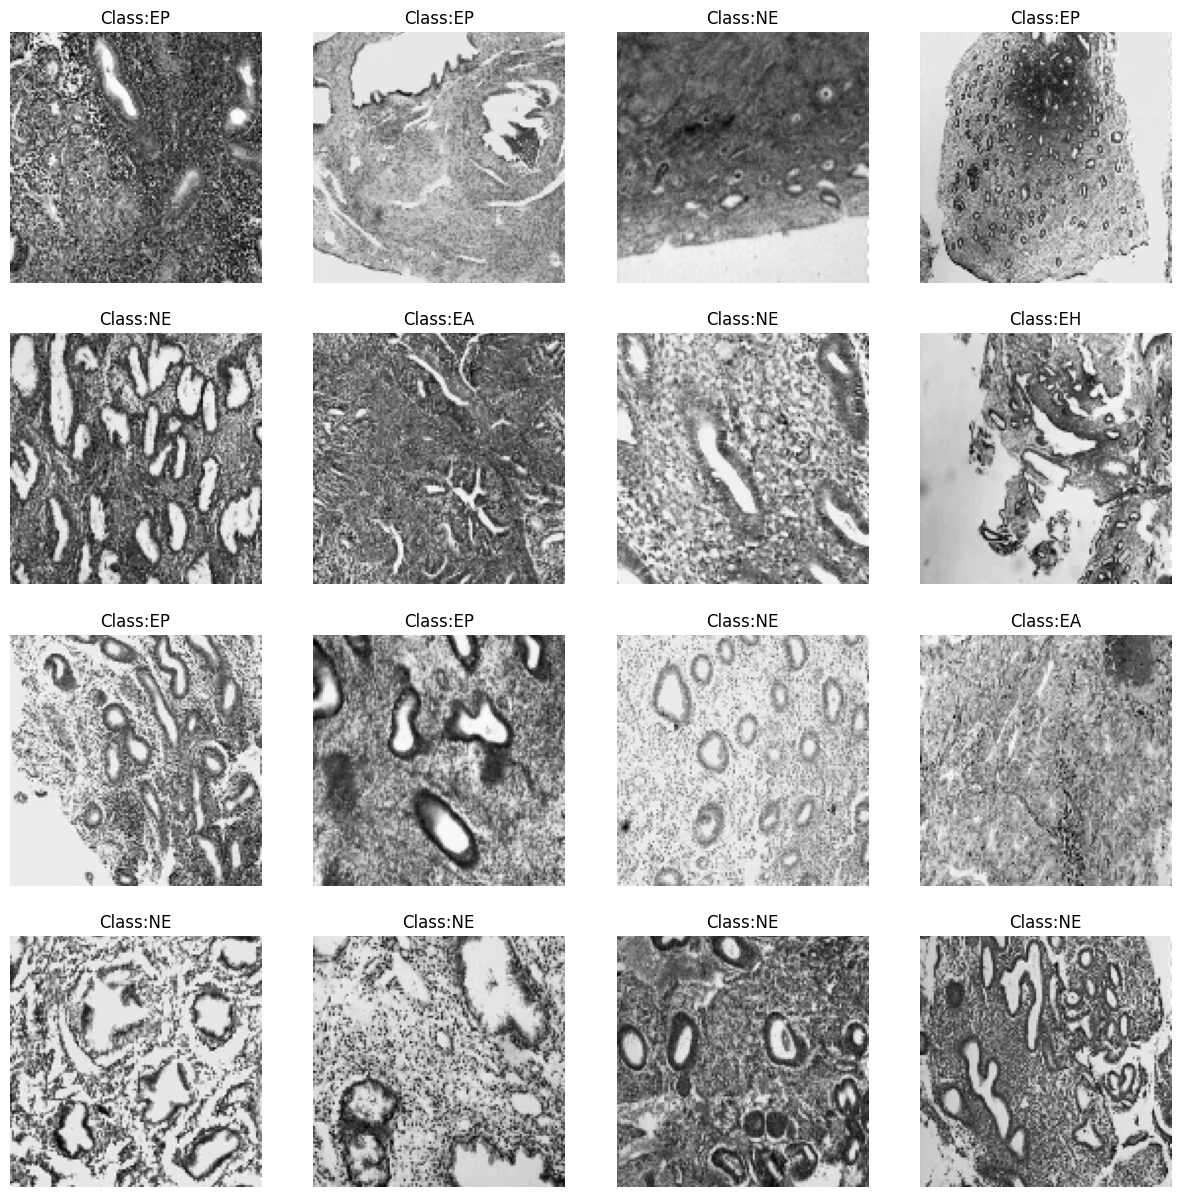

In [12]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        #idx = randint(0, 2890)
        idx = randint(0, 2790)
        plt.imshow(x[idx],cmap='gray')
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X,y)

### Data Splitting

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Algorithm - Convolutional Neural Network

In [14]:
y_train=to_categorical(y_train,dtype="int32")
y_test=to_categorical(y_test,dtype="int32")

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [16]:
cnn_model=Sequential()

cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(2,2),padding="same",activation="relu",input_shape = (128,128,1)))
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=4,activation="softmax"))

In [17]:
cnn_model.compile(optimizer=Adam(learning_rate=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         1

In [19]:
history=cnn_model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
40/40 [==============================] - 17s 394ms/step - loss: 1.3490 - accuracy: 0.3769 - val_loss: 1.3750 - val_accuracy: 0.3656
Epoch 2/100
40/40 [==============================] - 15s 366ms/step - loss: 1.3074 - accuracy: 0.3890 - val_loss: 1.3739 - val_accuracy: 0.3656
Epoch 3/100
40/40 [==============================] - 15s 381ms/step - loss: 1.3058 - accuracy: 0.3890 - val_loss: 1.3753 - val_accuracy: 0.3656
Epoch 4/100
40/40 [==============================] - 15s 369ms/step - loss: 1.2976 - accuracy: 0.3890 - val_loss: 1.3701 - val_accuracy: 0.3656
Epoch 5/100
40/40 [==============================] - 14s 363ms/step - loss: 1.2879 - accuracy: 0.3890 - val_loss: 1.3699 - val_accuracy: 0.3656
Epoch 6/100
40/40 [==============================] - 15s 366ms/step - loss: 1.2751 - accuracy: 0.3898 - val_loss: 1.3640 - val_accuracy: 0.3688
Epoch 7/100
40/40 [==============================] - 15s 389ms/step - loss: 1.2527 - accuracy: 0.4132 - val_loss: 1.3504 - val_accuracy:

40/40 [==============================] - 15s 365ms/step - loss: 0.0364 - accuracy: 0.9930 - val_loss: 4.2350 - val_accuracy: 0.4750
Epoch 58/100
40/40 [==============================] - 15s 363ms/step - loss: 0.0361 - accuracy: 0.9934 - val_loss: 3.5782 - val_accuracy: 0.4578
Epoch 59/100
40/40 [==============================] - 15s 364ms/step - loss: 0.0276 - accuracy: 0.9945 - val_loss: 4.0667 - val_accuracy: 0.4594
Epoch 60/100
40/40 [==============================] - 15s 364ms/step - loss: 0.0177 - accuracy: 0.9961 - val_loss: 3.6581 - val_accuracy: 0.4734
Epoch 61/100
40/40 [==============================] - 15s 364ms/step - loss: 0.0255 - accuracy: 0.9949 - val_loss: 4.1588 - val_accuracy: 0.4516
Epoch 62/100
40/40 [==============================] - 15s 367ms/step - loss: 0.0228 - accuracy: 0.9941 - val_loss: 3.7733 - val_accuracy: 0.4906
Epoch 63/100
40/40 [==============================] - 14s 363ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 3.7443 - val_accuracy: 0.478

### Accuracy plot-graphs

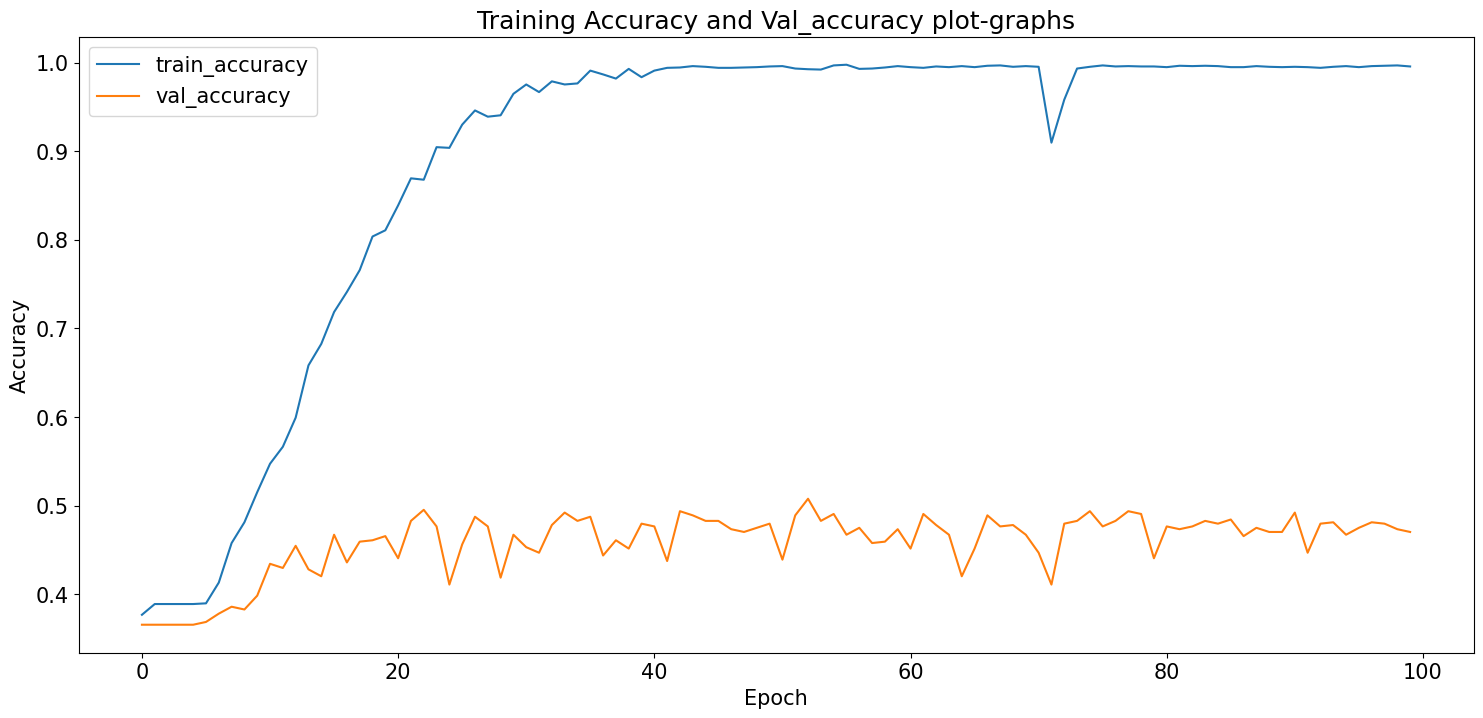

In [20]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=15
plt.plot(history.history["accuracy"],label="train_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.title(label="Training Accuracy and Val_accuracy plot-graphs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("acc_graph.png")
plt.show()


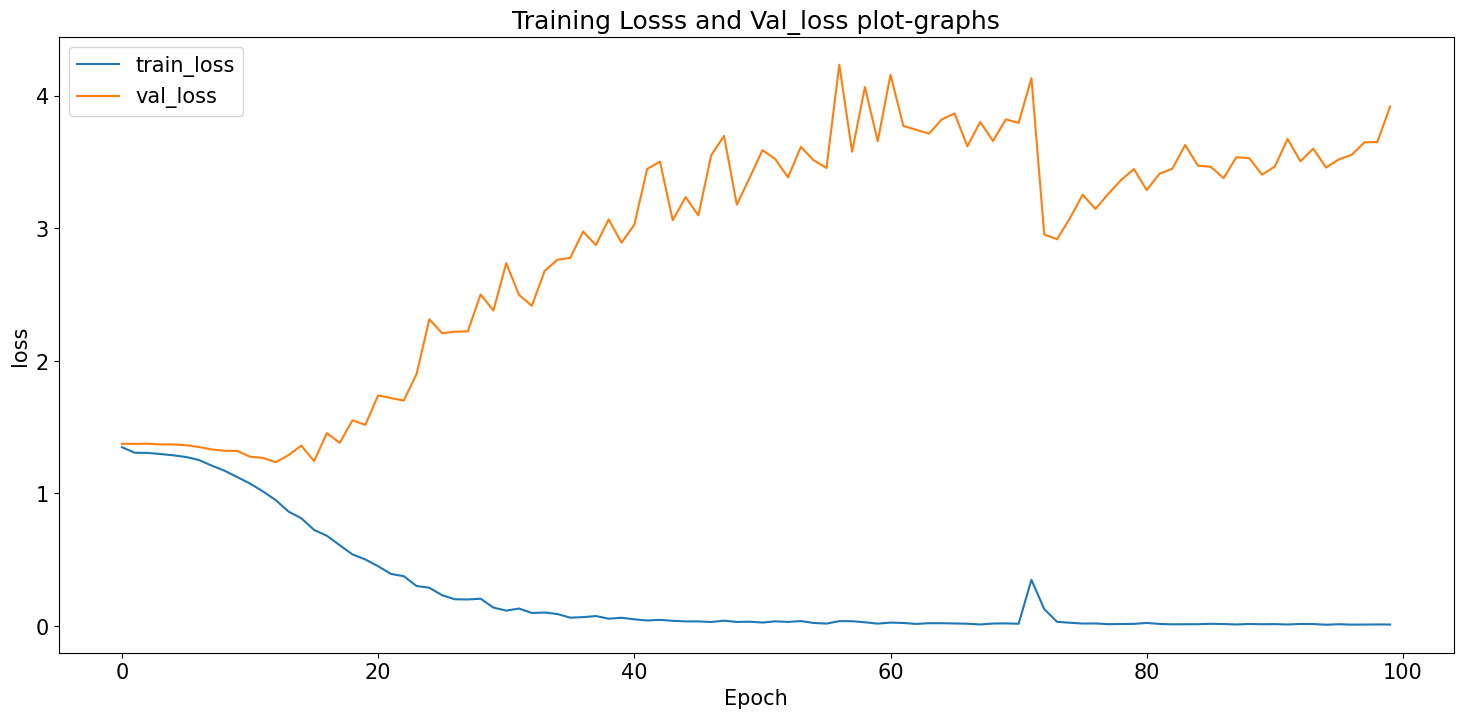

In [32]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=15
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title(label="Training Losss and Val_loss plot-graphs")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig("loss_graph.png")
plt.show()

In [33]:
cnn_prediction=cnn_model.predict(X_test,batch_size=64,verbose=1)

10/10 [==============================] - 1s 84ms/step


In [34]:
print(cnn_prediction)

[[1.52100381e-06 5.56075502e-05 9.99903679e-01 3.91368158e-05]
 [1.62143931e-01 1.22019665e-04 2.23418310e-01 6.14315748e-01]
 [1.73919778e-02 9.82589126e-01 7.82350071e-06 1.10773117e-05]
 ...
 [7.78838398e-08 8.42678162e-07 4.69868333e-04 9.99529243e-01]
 [7.70365680e-03 6.19445629e-02 1.12638295e-01 8.17713499e-01]
 [2.06426848e-04 1.04473601e-03 9.97567952e-01 1.18081796e-03]]


In [35]:
cnn_labels=[]
for i in range(len(cnn_prediction)):
    cnn_labels.append(np.argmax(cnn_prediction[i]))

In [36]:
print(cnn_labels)

[2, 3, 1, 1, 1, 3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 1, 3, 3, 0, 0, 2, 0, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3, 0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 0, 3, 2, 2, 2, 1, 3, 3, 3, 0, 3, 0, 3, 2, 0, 2, 3, 1, 3, 2, 3, 3, 3, 0, 3, 3, 2, 1, 3, 2, 3, 0, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 3, 2, 1, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 3, 1, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 0, 2, 2, 0, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 0, 0, 0, 0, 3, 1, 3, 3, 3, 1, 3, 0, 3, 3, 2, 2, 3, 0, 1, 2, 3, 3, 3, 2, 0, 2, 3, 2, 2, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 0, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 3, 1, 3, 1, 3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 0, 0, 1, 3, 3, 3, 0, 1, 0, 3, 3, 1, 

In [37]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [38]:
print(true_labels)

[3, 0, 1, 1, 2, 3, 3, 3, 0, 0, 3, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 3, 1, 1, 1, 3, 3, 1, 3, 2, 0, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 2, 2, 0, 3, 1, 1, 3, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2, 2, 0, 2, 0, 3, 0, 1, 1, 3, 3, 1, 1, 1, 0, 3, 3, 0, 3, 3, 1, 2, 0, 2, 1, 3, 0, 3, 0, 2, 3, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 2, 1, 0, 0, 2, 2, 1, 3, 3, 2, 2, 3, 1, 3, 0, 3, 2, 0, 2, 2, 1, 3, 0, 3, 0, 2, 3, 0, 0, 2, 2, 0, 0, 1, 0, 1, 3, 1, 2, 1, 0, 3, 0, 2, 2, 0, 3, 0, 2, 1, 1, 3, 1, 3, 0, 1, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 3, 3, 1, 3, 2, 0, 0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 2, 3, 0, 0, 0, 3, 0, 0, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 0, 0, 3, 1, 3, 3, 1, 1, 0, 0, 3, 3, 0, 0, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 0, 1, 3, 1, 3, 0, 3, 1, 3, 0, 3, 3, 0, 3, 0, 1, 2, 1, 1, 1, 3, 1, 3, 2, 3, 0, 2, 1, 2, 0, 2, 3, 1, 1, 3, 0, 1, 1, 1, 2, 2, 3, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 2, 1, 1, 2, 3, 0, 2, 

### Result Analysis

***Accuracy Score***

In [42]:
cnn_accuracy=accuracy_score(y_true=true_labels,y_pred=cnn_labels)
print("CNN Accuracy is {:.2f}%".format(cnn_accuracy*100.0))

CNN Accuracy is 47.03%


***Classification Report***

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_true=true_labels,y_pred=cnn_labels,target_names=class_labels))

              precision    recall  f1-score   support

          EA       0.59      0.34      0.43       133
          EH       0.50      0.38      0.43       154
          EP       0.37      0.28      0.32       119
          NE       0.46      0.70      0.55       234

    accuracy                           0.47       640
   macro avg       0.48      0.42      0.43       640
weighted avg       0.48      0.47      0.46       640



***Confusion Matrix***

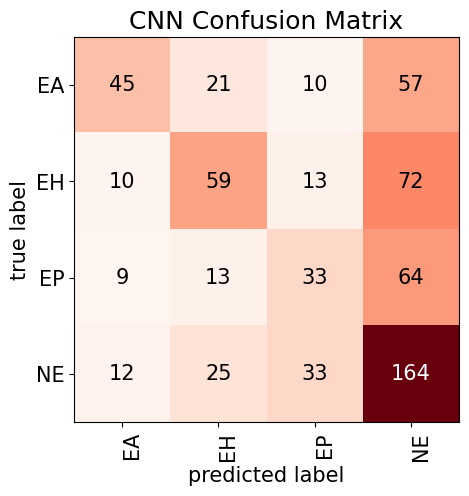

In [53]:
import mlxtend
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=cnn_labels),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="CNN Confusion Matrix")
plt.xticks(rotation=90)
plt.savefig("conf_mat.png")
plt.show()


In [52]:
pip install scikit-learn==0.22.0

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.22 which is incompatible.


  Using cached scikit_learn-0.22-cp37-cp37m-win_amd64.whl.metadata (7.2 kB)
Using cached scikit_learn-0.22-cp37-cp37m-win_amd64.whl (6.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


## Model Saving

In [30]:
pip install mlxtend

INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl.metadata (10 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [47]:
cnn_model.save(filepath="models/Convolutional_Neural_Network.h5")

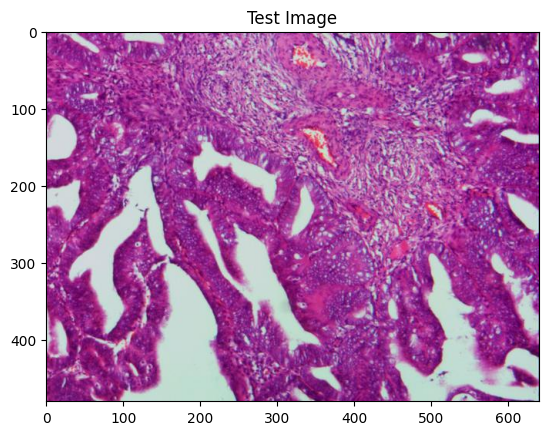

Prediction Result: [9.2391634e-01 5.6431368e-02 1.9228300e-02 4.2401568e-04]
Class number: 0
Predicted class: EA


In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained CNN model
cnn_model_path = "models/Convolutional_Neural_Network.h5"
cnn_model = load_model(cnn_model_path)

# Define the classes
class_labels = os.listdir(base_dir)

# Function to prepare the image for prediction
def prepare_test_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128), grayscale=True)
    x = image.img_to_array(img)
    x = x / 255.0
    return np.expand_dims(x, axis=0)

# Function to predict and display the result
def predict_and_display_image(model, img_path, class_labels):
    result = model.predict(prepare_test_image(img_path))
    img = cv2.imread(img_path)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Test Image')
    plt.show()

    print("Prediction Result:", result[0])

    class_result = np.argmax(result, axis=1)
    print("Class number:", class_result[0])
    print("Predicted class:", class_labels[class_result[0]])

# Test with an image
test_image_path = 'C:\\Users\\DELL\\Desktop\\Endometrium\\a.jpg'  # Replace with the actual path of your test image
predict_and_display_image(cnn_model, test_image_path, class_labels)
